In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# 병합 군집
### 클러스터가 지정한 개수가 될 때까지 가장 거리가 가까운 클러스터 2개를 합한다.

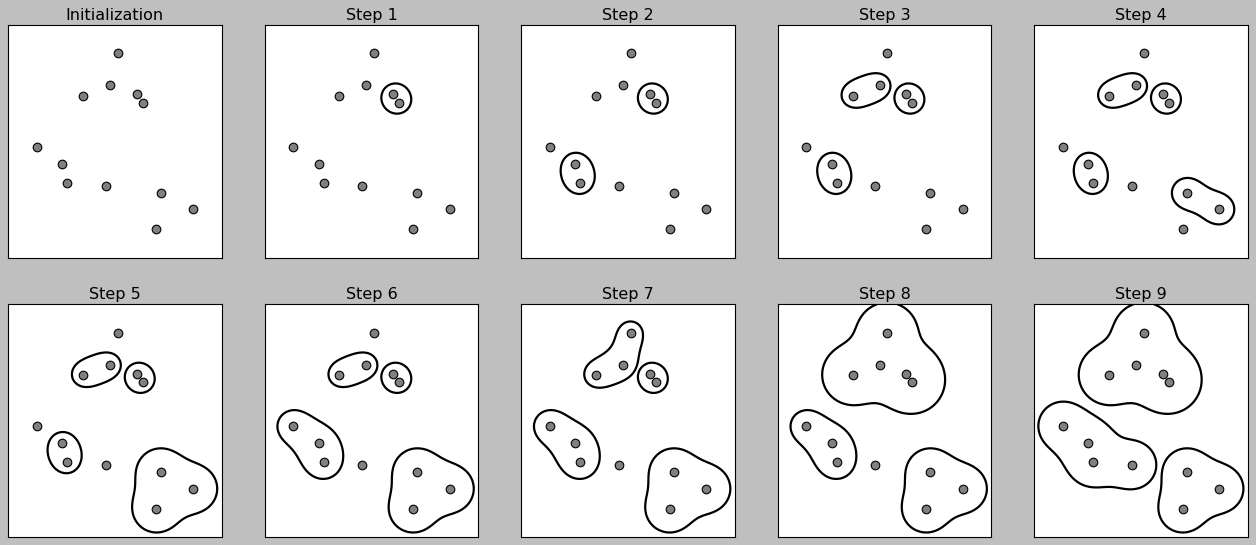

In [19]:
mglearn.plots.plot_agglomerative_algorithm()

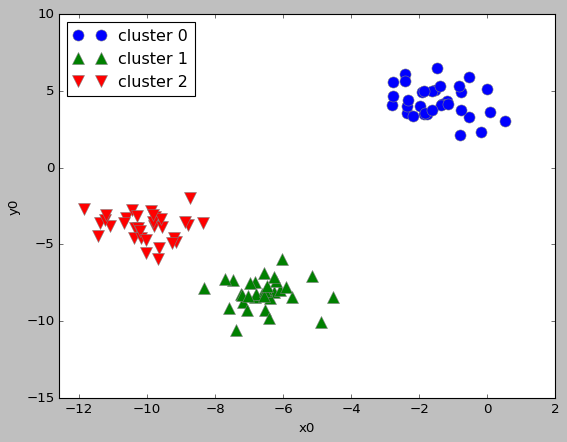

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel("x0")
plt.ylabel('y0')
plt.show()

# 계층적 군집과 덴드로그램
### 병합군집은 계층적 군집을 만들고 이를 덴드로그램으로 시각화할 수 있다.

Text(0, 0.5, 'distance between cluster')

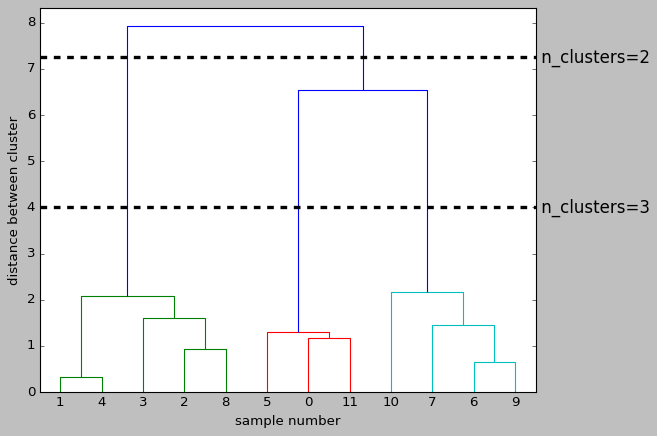

In [21]:
from scipy.cluster.hierarchy import dendrogram, ward
X,y = make_blobs(random_state=0, n_samples=12)

# 병합군집을 실행할 때 생성된 거리 정보가 담긴 배열
linkage_array = ward(X)

dendrogram(linkage_array)

# dendrogram 의 plt를 받아온다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.hlines(xmin=bounds[0], xmax=bounds[1], y=7.25, ls='--',lw=3, colors='k')
ax.hlines(xmin=bounds[0], xmax=bounds[1], y=4, ls='--',lw=3, colors='k')

ax.text(bounds[1], 7.25, " n_clusters=2",fontdict={'size':15}, va='center')
ax.text(bounds[1], 4, " n_clusters=3",fontdict={'size':15}, va='center')

plt.xlabel("sample number")
plt.ylabel("distance between cluster") 
# 클러스터가 3개에서 2개로 줄일 때 거리가 급격히 증가하는 것을 보아 3개가 클러스터 3개가 적절하다는 것을 알 수 있다.

In [22]:
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

# DBSCAN (density-based spatial clustering of applications with noise)
### min_samples : 줄일수록 샘플이 덜 조밀하게 존재하는 구역도 같은 클러스터로 묶인다.
### eps : 늘릴수록 공통된 클러스터로 묶인다.
## 특징 : 
### 묶이지 않은 클러스터를 잡음 클러스터로 분류한다.
### 클러스터의 개수를 미리 정할 필요가 없다.
### eps 거리 안에 min_samples 개수 만큼 샘플이 있다면 같은 클러스터로 묶는다.
### 하나의 클러스터에서 뻗어나가면서 클러스터를 묶기 때문에 다양한 클러스터 모양을 만들 수 있다.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


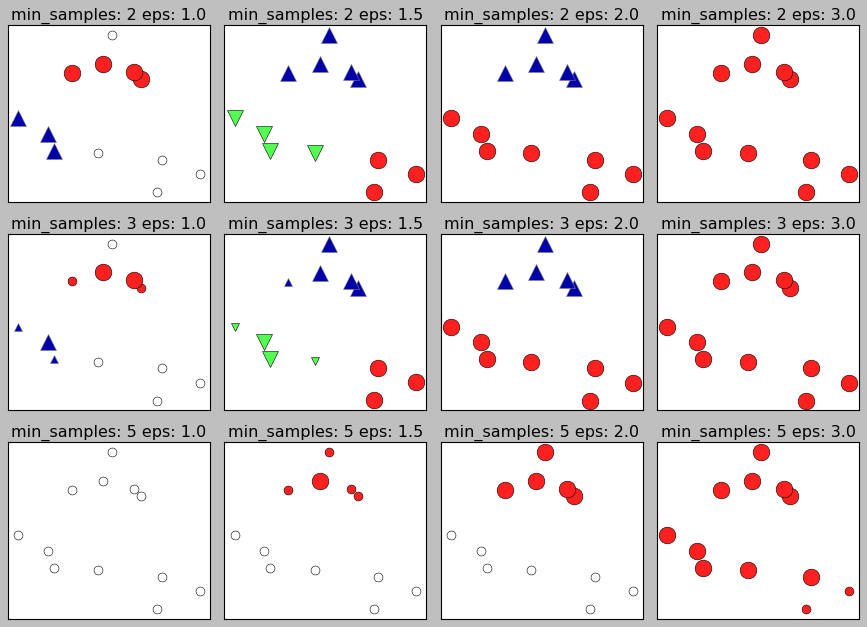

In [23]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'x1')

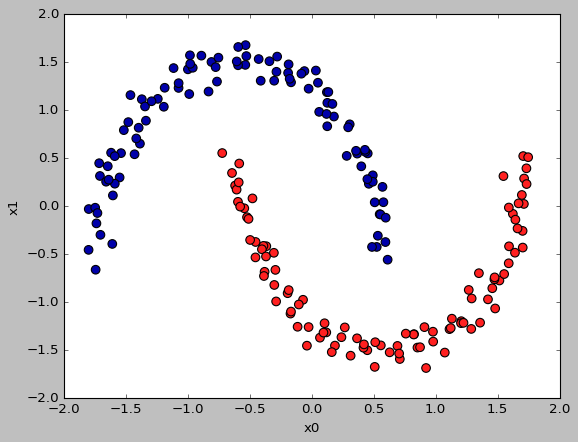

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.xlabel('x0')
plt.ylabel('x1')


# 군집 알고리즘 평가

# ARI
### 군집 알고리즘의 cluster label 은 실제 데이터의 순서와 무관하게 설정된다.
### 따라서 분류 클래스를 단순 비교하는 accuracy_score 은 적절한 성과 평가 방법이 아니다.
<br>

### 단점 :
### 군집 알고리즘은 사용하는 경우는 타깃 값을 모르는 상황에서 비지도학습을 적용해보기 위해서이다. 따라서 ARI 성과 평가 방법은 타깃값이 필요하기 때문에 실용성이 부족하다.

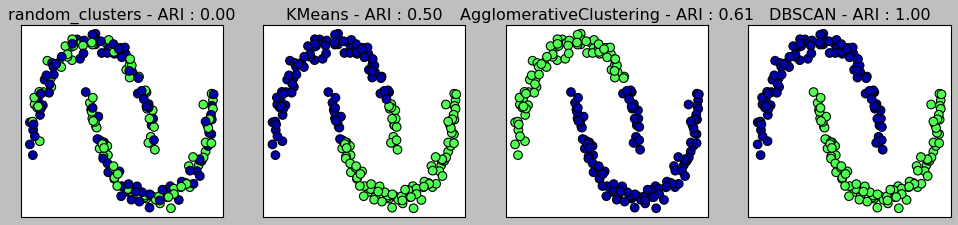

In [25]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

X,y = make_moons(n_samples=200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize = (15,3), subplot_kw={'xticks':(), 'yticks':()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X)) 

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='k')
axes[0].set_title(f"random_clusters - ARI : {adjusted_rand_score(y, random_clusters):0.2f}")

for ax, algorithm in zip(axes[1:], algorithms) :
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3,
               edgecolors='k', s=60)
    ax.set_title(f"{algorithm.__class__.__name__} - ARI : {adjusted_rand_score(y,clusters):0.2f}")
    

## 얼굴 데이터셋으로 군집 알고리즘 비교

In [26]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 사람마다 최대 50개의 이미지만 사용
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target) :
    # np.where은 조건식의 맞는 index 배열을 반환한다.
    # mask에서 해당 배열의 50번째 까지만 True 로 변환한다.
    mask[np.where(people.target==target)[0][:50]] = True
    
X_people = people.data[mask]
y_people = people.target[mask]

# 흑백 이미지 값(0~255) 를 (0~1)까지로 조정
X_people /= 255
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify=y_people, random_state=42)

In [27]:
# PCA 로 전처리한 데이터로 학습
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

## DBSCAN 으로 얼굴 데이터셋 분석하기

In [28]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유 레이블 : ", np.unique(labels))
print("클러스터 별 포인터 수 : ", np.bincount(labels+1))

고유 레이블 :  [-1]
클러스터 별 포인터 수 :  [2063]


In [29]:
# 튜닝하지 않는 dbscan은 모두 잡음 처리됨
# 튜닝 :
# 1. eps 를 늘려 이웃을 늘리는 방법
# 2. min_samples 를 낮추어 최소 클러스터 포인터 수를 낮추는 방법

dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유 레이블 : ", np.unique(labels))
print("클러스터 별 포인터 수 : ", np.bincount(labels+1))

고유 레이블 :  [-1]
클러스터 별 포인터 수 :  [2063]


In [30]:
dbscan = DBSCAN(min_samples=3, eps = 15)
labels = dbscan.fit_predict(X_pca)
print("고유 레이블 : ", np.unique(labels))
print("클러스터 별 포인터 수 : ", np.bincount(labels+1))

고유 레이블 :  [-1  0]
클러스터 별 포인터 수 :  [  12 2051]


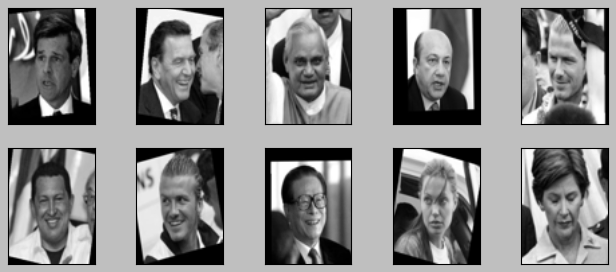

In [31]:
# 이상치 확인
noise = X_people[labels==-1]

fig, axes = plt.subplots(2,5, subplot_kw={"xticks":(), "yticks":()}, figsize = (10,4))

for image, ax in zip(noise, axes.ravel()) :
    ax.imshow(image.reshape(image_shape), cmap = 'gray')

In [32]:
for eps in range(1,14,2) :
    print("\neps=",eps)
    dbscan = DBSCAN(min_samples=2, eps = eps)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수 : ", len(np.unique(labels)))
    print("클러스터 별 포인터 수 : ", np.bincount(labels+1))
    


eps= 1
클러스터 수 :  1
클러스터 별 포인터 수 :  [2063]

eps= 3
클러스터 수 :  2
클러스터 별 포인터 수 :  [2061    2]

eps= 5
클러스터 수 :  5
클러스터 별 포인터 수 :  [2054    3    2    2    2]

eps= 7
클러스터 수 :  10
클러스터 별 포인터 수 :  [1896  151    2    2    2    2    2    2    2    2]

eps= 9
클러스터 수 :  9
클러스터 별 포인터 수 :  [1288  761    2    2    2    2    2    2    2]

eps= 11
클러스터 수 :  4
클러스터 별 포인터 수 :  [ 508 1551    2    2]

eps= 13
클러스터 수 :  2
클러스터 별 포인터 수 :  [  96 1967]


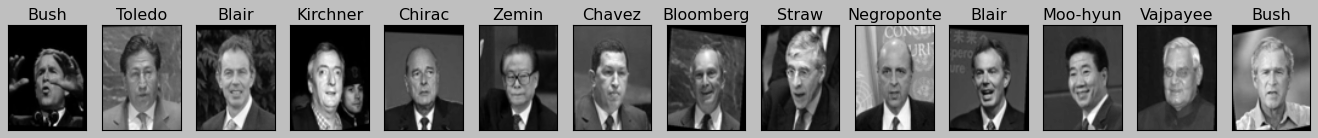

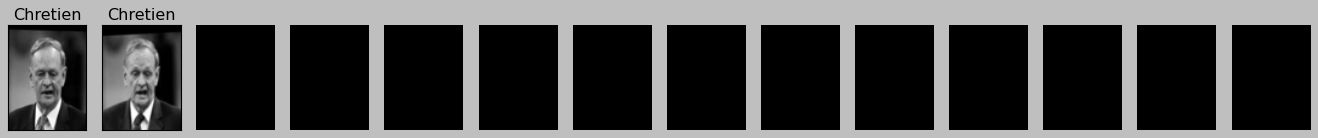

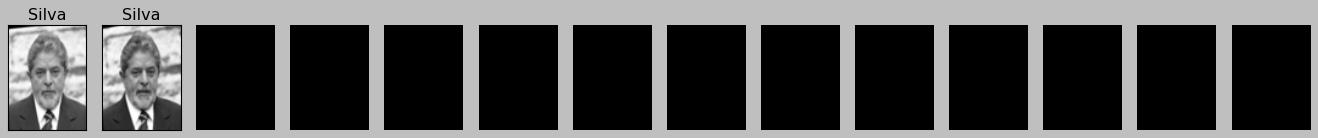

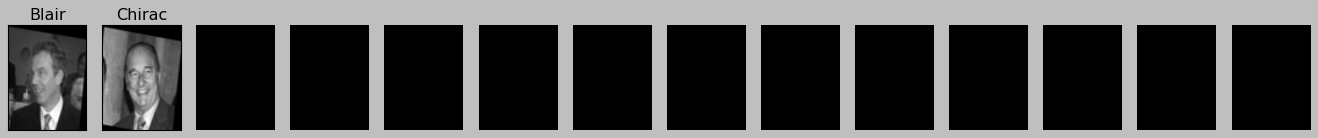

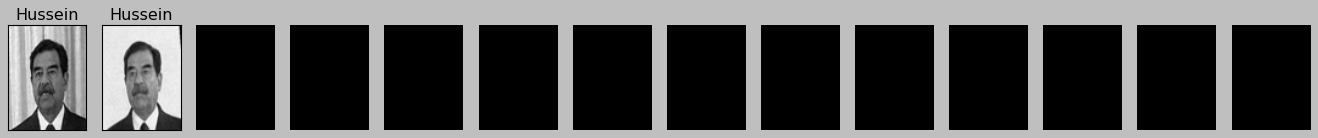

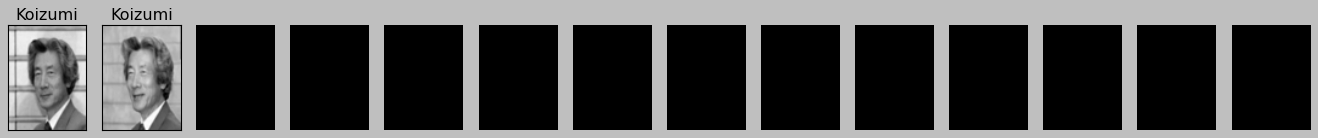

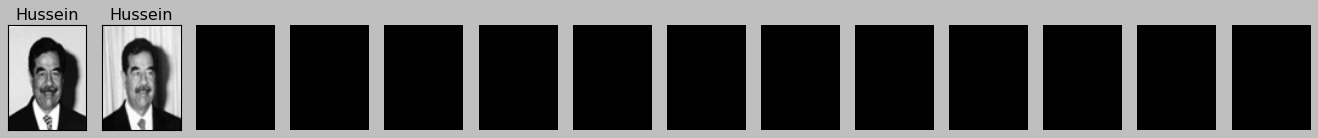

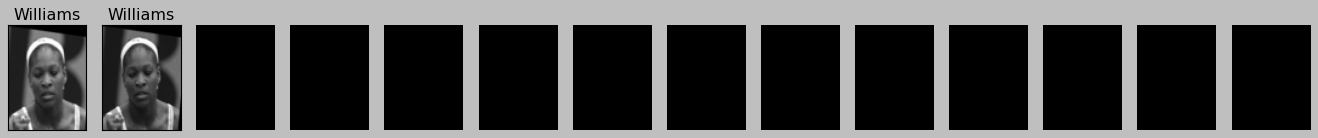

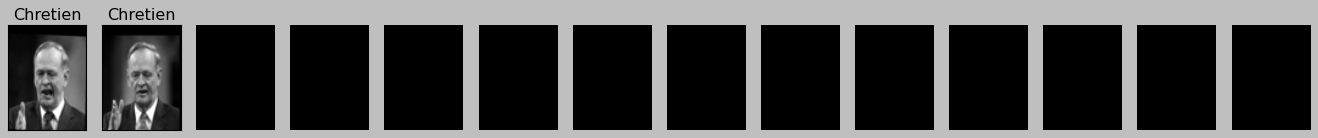

In [50]:
# min_samples=2, eps=7 일 때의 클러스

dbscan = DBSCAN(min_samples=2, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1) :
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1,14, figsize=(14*1.5, 4), subplot_kw={'xticks':(), 'yticks':()})
    
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes) :
        ax.imshow(image.reshape(image_shape), cmap = 'gray')
        ax.set_title(people.target_names[label].split()[-1])
        i +=1
        
    for j in range(len(axes) -i) :
        axes[i+j].imshow(np.array([[0]*65]*87), cmap ='gray')
        axes[i+j].axis('off')
        

# K-평균으로 얼굴 데이터셋 분석하기

In [51]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("K-평균의 클러스터 크기 : ", np.bincount(labels_km))

K-평균의 클러스터 크기 :  [ 96  76 276 196 291 315 152  18 494 149]


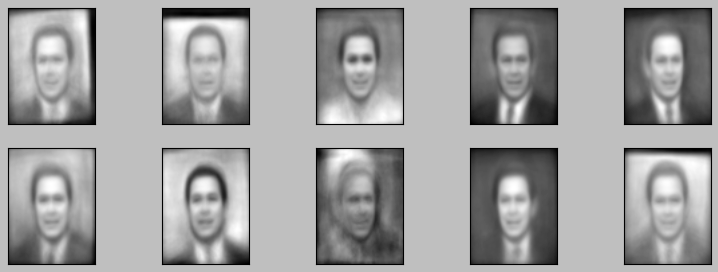

In [53]:
# 클러스터 중심 시각화
fig, axes = plt.subplots(2,5, subplot_kw={'xticks':(), 'yticks':()}, figsize = (12,4))

for center, ax in zip(km.cluster_centers_, axes.ravel()) :
    image = pca.inverse_transform(center)
    ax.imshow(image.reshape(image_shape), cmap = 'gray')


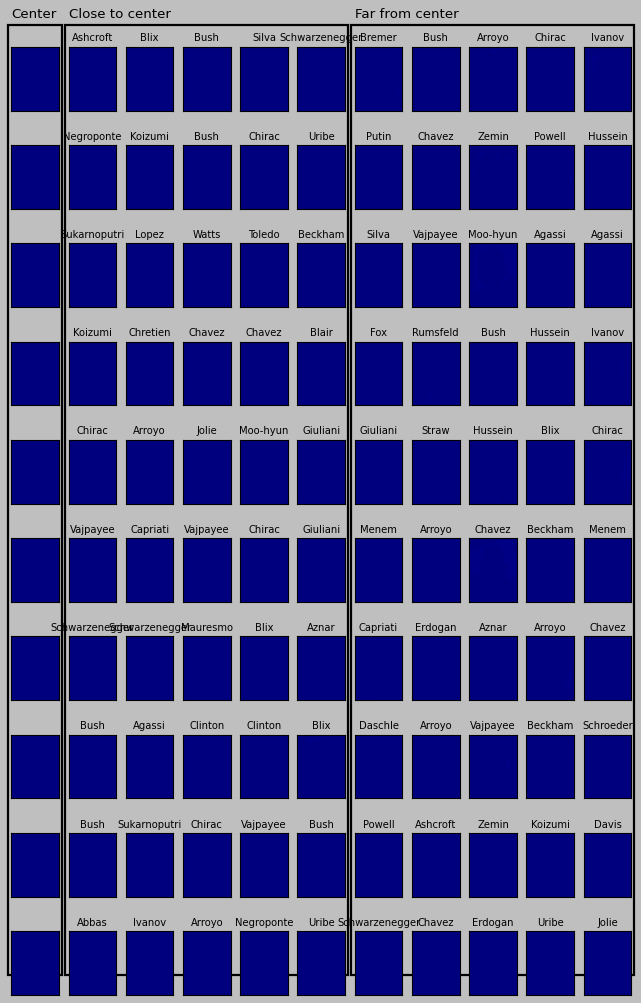

In [54]:
mglearn.plots.plot_kmeans_faces(km,pca,X_pca, X_people, y_people, people.target_names)